<a href="https://colab.research.google.com/github/purnimapatel/sweep_algo-on-sphere-in-python/blob/master/Voronoi__tessellation_on_sphere.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#generating random points on a sphere wirh r=1,centre=0
import numpy as np
import math as m
def sample_sphere(npoints,ndim=3):
  vec=np.random.randn(ndim,npoints)
  vec/=np.linalg.norm(vec,axis=0)
  return(vec)
pts=sample_sphere(10).transpose() 
print(pts)

[[ 0.38277273  0.28180491 -0.87981306]
 [ 0.64295148 -0.41400657 -0.64436942]
 [ 0.8223233   0.2435434   0.51426745]
 [-0.24653945  0.88099733 -0.40380937]
 [ 0.16988807 -0.88973658  0.4236825 ]
 [-0.68362608 -0.61260161  0.39670475]
 [-0.86234566  0.02327995 -0.50578454]
 [-0.97494932  0.20972809  0.07408072]
 [ 0.47052679 -0.07505648 -0.87918773]
 [ 0.17982877  0.55730803 -0.81059816]]


In [21]:
#convertion of cartesian co-ordinate to spherical co-ordinate
def cart2sph(x,y,z):
  x2y2=x**2+y**2
  r=m.sqrt(x2y2+z**2)
  elev=m.atan2(z,m.sqrt(x2y2))
  az=m.atan2(y,x)
  return r,elev,az
def cart2spA(pts):
  return np.array([cart2sph(x,y,z) for x,y,z in pts])
polar_p=cart2spA(pts)    
print(polar_p)

[[ 1.         -1.07546877  0.63462336]
 [ 1.         -0.70019841 -0.57208616]
 [ 1.          0.54015327  0.28793476]
 [ 1.         -0.415677    1.84365787]
 [ 1.          0.43750689 -1.38212537]
 [ 1.          0.40792424 -2.41093296]
 [ 1.         -0.53029117  3.11460313]
 [ 1.          0.07414864  2.92970475]
 [ 1.         -1.07415477 -0.15818316]
 [ 1.         -0.94517283  1.25866971]]


In [22]:
# points sorted lexicographically
p=polar_p[np.argsort(polar_p[:, 1])]
p

array([[ 1.        , -1.07546877,  0.63462336],
       [ 1.        , -1.07415477, -0.15818316],
       [ 1.        , -0.94517283,  1.25866971],
       [ 1.        , -0.70019841, -0.57208616],
       [ 1.        , -0.53029117,  3.11460313],
       [ 1.        , -0.415677  ,  1.84365787],
       [ 1.        ,  0.07414864,  2.92970475],
       [ 1.        ,  0.40792424, -2.41093296],
       [ 1.        ,  0.43750689, -1.38212537],
       [ 1.        ,  0.54015327,  0.28793476]])

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


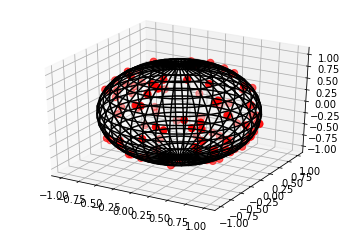

In [ ]:
#Visualization of the points.
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
phi=np.linspace(0,np.pi,20)
theta=np.linspace(0,2*np.pi,40)
x=np.outer(np.sin(theta),np.cos(phi))
y=np.outer(np.sin(theta),np.sin(phi))
z=np.outer(np.cos(theta),np.ones_like(phi))
xi,yi,zi=pts.transpose()
fig=plt.figure()
ax=fig.gca(projection='3d')
ax.plot_wireframe(x,y,z,color='k',rstride=1,cstride=1)
ax.scatter(xi,yi,zi,s=50,c='red',zorder=10)

In [ ]:
#defining the priority Queue
class PriorityQueue:
    def __init__(self):
        self.pq = []
        self.entry_finder = {}
        self.counter = itertools.count()

    def push(self, item):
        # check for duplicate
        if item in self.entry_finder: return
        count = next(self.counter)
        # use x-coordinate as a primary key (heapq in python is min-heap)
        entry = [item.x, count, item]
        self.entry_finder[item] = entry
        heapq.heappush(self.pq, entry)

    def remove_entry(self, item):
        entry = self.entry_finder.pop(item)
        entry[-1] = 'Removed'

    def pop(self):
        while self.pq:
            priority, count, item = heapq.heappop(self.pq)
            if item is not 'Removed':
                del self.entry_finder[item]
                return item
        raise KeyError('pop from an empty priority queue')

    def top(self):
        while self.pq:
            priority, count, item = heapq.heappop(self.pq)
            if item is not 'Removed':
                del self.entry_finder[item]
                self.push(item)
                return item
        raise KeyError('top from an empty priority queue')

    def empty(self):
        return not self.pq
            


In [ ]:
#implimentation of the DoublyCircularSkiplist
import random
class InsertError(Exception):
  pass
class Node(object):
  def __init__(self,value=None,next=None,prev=None):
    self.value=value
    self.next=next
    self.prev=prev 
  def __repr__(self):# representing value of a node.
    return "{0}: {1}".format(self.__class__.__name__,self.value)

  def __lt__(self,other):# checking is less than other.
    return self.value <other.value

  def __le__(self,other):     #checking is less than or equal to other
    return self.value<=other.value

  def __eq__(self,other):      #checking to equal to other
    return self.value==other.value

  def __ge__(self,other):     #checking is greater than or equal to other
    return self.value>= other.value

  def __gt__(self,other):    #checking is greater  than or equal to  other
    return self.value > other.value
  def __ne__(self,other):    #checking is not equal to other
    return self.value != other.value

class DoublyCircularLinkedList(object):
  def __init__(self):
    self.head=None
  def __str__(self):
    return("DCLL:{0} items starting with {1}".format(len(self),self.head.value))
  def __iter__(self):
    self.current=self.head
    return self
  def __next__(self):
    if self.current is none:
      raise StopIteration()
    cur=self.current
    self.current=cur.next
    return cur
  def __len__(self):
    count=0
    for node in self:
      count+=1
    return count
    #finding node at given Index
  def __getItem__(self,Index):
    if Index < 0:
      raise IndexError("Invalid Index")
    for i,node in enumerate(self):
      if Index == i:
        return node
    raise IndexError("Index '{0}' is out of range".format(Index))
  def __contains__(self,value):
    return self.find(value) is not None
  def find(self,value):
    for node in self:
      if node.value == value:
        return node
  def InsertEnd(value):
    if(head==None):
      new_node=Node(0)
      new_node.value=value
      new_node.next=new_node.prev=new_node
      head=new_node
      return
    else:
      #if list is not empty
      #find last node
      last=(head).prev
      #create the node dynamically
      new_node=Node(0)
      new_node.value=value
      #move head to the next of the new node
      new_node.next=head
      #making the new node prev of the head
      head.prev=new_node
      #Make new node next of the old last
      last.next=new_node 
  #inserting new node at the beginning.
  def InsertBegin(self,insert_node):
    # pointer pointing to the last n  ode
    last=head.prev
    #new_node=Node(0)
    #new_node.data = value  #inserted the data
    #now set the prev and next of the new node
    insert_node.next=self.head
    insert_node.prev=last
    #update the prev and next of the head and last
    last.next=head.prev=insert_node

    #set the head pointer
    head=new_node 
  #inserting the new node after a specific node
  def InsertAfter(value1,value2):
    new_node=Node(0)
    new_node.data=value1
    #find the node having data value2 and node next to it
    temp=head
    while (temp.data != value2):
      temp = temp. next
    next=temp.next
    #now insert the new node between temp and next
    temp.next = new_node
    new_node.prev = temp
    new_node.next = next
  def RemoveFirst(self):
    if self.head is None:
      return None
    last=head.prev
    old_head=self.head
    self.head=head.next
    last.next=self.head
    head.prev=last
    return old_head
  def RemoveAfter(self,existing_node):
    if existing_node.next is None:
      return None
    old_next=existing_node.next
    new_next=existing_node.next.next
    existing_node.next=new_next
    new_next.prev=existing_node
    return old_next
class SortedDCLL(DoublyCircularLinkedList):
  #for maintaining the corrrect Sorted order.
  def find(self,value):
    #here this process be more efficient as the list be sorted.
    for node in self:
      if node.value == value:
        #yup,found it.
        return node
      if node.value > value:
        return None
    return None
  #search a particular node
  def InsertAfter(self,exist_node,new_node):
    if not exist_node <= new_node:
      raise InsertError("Invalid placement for the new node.")
    if exist_node.next and not new_node <= exist_node.next:
      raise InsertError("Invalid placement for the new node")
    return super(SortedDCLL , self).InsertAfter(exist_node,new_node)
  def InsertFirst(self,new_node):
    if self.head and not new_node <= self.head:
      raise InsertError("Invalid placement for the new node")
    return super(SortedDCLL , self).InsertFirst(new_node)
  def Insert(self,new_node):
    if not self.head or new_node < self.head:
      self.InsertFirst(new_node)
      return
    previous = self.head

    for node in self:
      if previous <= new_node <= node :
        self.InsertAfter(previous, new_node)
        return
      previous = node
    return self.InsertAfter(previous,new_node)
  def Remove(self,remove_node):
    previous = self.head 
    # traversing
    for node in self:
      if node == remove.node:
        return self.RemoveAfter(previous)
      previous = node 
    return None

  #Sorting is Done,now form the skiplist of the DCLL.




In [ ]:
class SkipListNode(Node):
  def __init__(self,value=None,next=None,prev=None,down=None):
    super(SkipListNode,self).__init__(value=value,next=next,prev=prev)
    self.down=down
class Skiplist():
  list_class = SortedDCLL
  node_class = SkipListNode
  max_layers = 20
  def __init__(self,list_class = None,node_class = None,max_layer = None):
    if list_class is not None:
      self.list_class = list_class
    if node_class is not None:
      self.node_class = node_class
    if max_layers is not None:
      self.maxlayers = max_layers

    self.layers = [self.list_class()]

    def __str__(self):
      return "Skiplist: {0} items".format(len(self.layers[-1]))
    def __len__(self):
      return len(self.layers[-1])
    def __contains__(self,value):
      return self.find(value)
    def __iter__(self):
      return iter(self.layers[-1])
    
    def generate_height(self):
      """Generate a random height(between 2 and max_layers"""
      return random.randint(2,self.max_layers)
    def find(self,value):
      layer_offset = 0
      current = self_layers[layer_offset].head
      is_first = True

      while True:
        if current is None:
          # all options have been exhausted
          break
        if current.value == value:
          #found it
          return current
        elif current.value > value:
          if is_first:
            """We are at the beginning of the list, but there may be levels below with numbers before
            this one."""
            layer_offset += 1

            if layer_offset <= len(self.layers)-1:
              current = self.layers[layer_offset].head
              continue
            else:
              break
        if current.next and current.next.value <= value:
          # the next node in the current layer might match.
          current = current.next
          is_first = False
          continue
        else:
          #either the next node is too high or we reached the end of the layer.
          if current.down is not None:
            current = current.down
            layer_offset += 1
            continue
          else:
            break
      return None
  def insert(self,value,**kwargs):
     num_layers = len(self.layers)
     height = self.generate_height()

     #Make sure we have enough layers to accomodate.
     if height > num_layers:
       for i in range(num_layers,height):
         self.layers.insert(0,self.list_class())
     down = None

     for i in range(height):
       new_node = self.node_class(value = value,**kwargs)
       self.layers[num_layers - (i + 1)].insert(new_node)
       new_node.down = down
       down = new_node
   # for removing a node
  def remove(self,value):
     node = self.find(value)
     if node is None:
       return None
     for layer in self.layers:
       layer.remove(node)
    
  def debug(self, column_width = 4):
     """ Print a representation of the skiplist's structure.
     default "column_width" parameter is 4."""
     column_format_string ="{:'="+ str(column_width) + "}"
     full = self.layers[-1]

     for layer_offset,layer in enumerate(self.layers):
       print("{:<3}".format(layer_offset), end=": ")
       for node in full:
         if node.value in layer:
           print(column_format_string.format(node.value),end="")
         else:
           print("    ",end="")
  print()

        
      

    

In [ ]:
#Doubly Connected Edge list
import numpy as np
from operator import add, sub
from itertools import islice


class Vertex(object):
    
    def __init__(self, px, py, pz, identifier=None):
        self.identifier = identifier
        self.x = px
        self.y = py
        self.z = pz
        self.incidentEdge = None
        
    def setTopology(self, newIncedentEdge):
        self.incidentEdge = newIncedentEdge
        
    def p(self):
        return (self.x,self.y,self.z)

    def __add__(self, other):
        return tuple(add(*pq) for pq in zip(self.p(), other.p()))

    def __sub__(self, other):
        return tuple(sub(*pq) for pq in zip(self.p(), other.p()))

    def __repr__(self):
        return "v{} ({}, {}, {})".format(self.identifier, self.x, self.y, self.z)

class hEdge(object):
    
    def __init__(self, identifier):
        self.identifier = identifier
        self.origin = None
        self.twin = None
        self.incidentFace = None
        self.next = None
        self.previous = None

    def setTopology(self, newOrigin, newTwin, newIncindentFace, newNext, newPrevious):
        self.origin = newOrigin
        self.twin = newTwin
        self.incidentFace = newIncindentFace
        self.next = newNext
        self.previous = newPrevious

    def vector(self):
        return self.next.origin - self.origin 
        
    def loop(self):
        """Loop from this hedge to the next ones. Stops when we are at the current one again."""
        yield self
        e = self.next
        while e is not self:
            yield e
            e = e.next
            
    def wind(self):
        """iterate over hedges emerging from vertex at origin in ccw order"""
        yield self
        e = self.previous.twin
        while e is not self:
            yield e
            e = e.previous.twin
    def __repr__(self):
        return "he{}".format(self.identifier)


class Face(object):
    
    def __init__(self, identifier):
        self.identifier = identifier
        self.edgeComponent = None
        self.normal = None

    def setTopology(self, newEdgeComponent):
        self.edgeComponent = newEdgeComponent
        e1, e2, e3 = islice(self.edgeComponent.loop(), 3)
        self.normal = tuple(np.cross(e2.origin-e1.origin, e3.origin-e2.origin))
        
    def loopOuterVertices(self):
        for e in self.edgeComponent.loop():
            yield e.origin
def __repr__(self):
        # return "face( innerComponent-{}, outerComponent-{} )".format(self.outerComponent, self.innerComponent)
        return "f{}".format(self.identifier)


class DCEL(object):
    
    def __init__(self):
        self.vertexDict = {}
        self.hedgeDict = {}
        self.faceDict = {}
        self.infiniteFace = None

    def getNewId(self, D):
        """NOTE: only tested with python v3.6, where dicts preserve insertion-order of items"""
        if len(D) == 0:
            return 0
        else:
            return list(D.values())[-1].identifier + 1
        
    def createVertex(self, px, py, pz):
        identifier = self.getNewId(self.vertexDict)
        v = Vertex(px,py,pz, identifier)
        self.vertexDict[identifier] = v
        return v
    def createHedge(self):
     identifier = self.getNewId(self.hedgeDict)
     e = hEdge(identifier)
     self.hedgeDict[identifier] = e
     return e
        
    def createFace(self):
        identifier = self.getNewId(self.faceDict)
        f = Face(identifier)
        self.faceDict[identifier] = f
        return f

    def remove(self, element):
        """Be careful: not a safe removal. References to element may still exist."""
        if type(element) is Vertex:
            del self.vertexDict[element.identifier]
            del element
        elif type(element) is hEdge:
            del self.hedgeDict[element.identifier]
            del element
        elif type(element) is Face:
            del self.faceDict[element.identifier]
            del element
        else:
            raise TypeException("Type "+str(type(element))+" cannot be removed.")

    def __repr__(self):
        s = "{} \t\t\t{}\n".format("VERTEX", "incidentEdge")
        for v in self.vertexDict.values():
            s += "{}:\t\t{}\n".format(v, v.incidentEdge)

        s += "\n{} \t{}\t{}\t{}\t{}\t{}\n".format("hEDGE","origin","twin","face","next","previous")
        for e in self.hedgeDict.values():
            s += "{}:\t v{}\t{}\t{}\t{}\t{}\n".format(e, e.origin.identifier,
                                  e.twin, e.incidentFace, e.next, e.previous)

        s += "\n{} \t{}\n".format("FACE", "edgeComponent")
        for f in self.faceDict.values():
            s += "{}:\t{}\n".format(f, f.edgeComponent)
        return s

    def checkEdgeTwins(self):
        for e in self.hedgeDict.values():
            if not e == e.twin.twin:
                print("this edge has a problem with its twin:"),
                print(e)



In [ ]:
class Voronoi:
  def __init__(self,points):
    self.output=edge_list()#the initialization for the doubly connected edge list.
    self.beach_line=skiplist()#the initialization for the skiplist.
    self.q_site=PriorityQueue()#site-events.
    self.q_circle=PriorityQueue()#circle-events.
    q_site=sorted()
  def process(self):
    while not self.q_site.empty():
      if not self.q_circle.empty() and (self.q_circle.top().x <= self.q_site.top().x):
        self.process_circle() # handle circle event
      else:
        self.process_site() # handle site event

        # after all points, process remaining circle events
    while not self.event.empty():
            self.process_event()
    #traverse the edge and add cell record.
  def process_site():
    
  
    


